In [46]:
import matplotlib.pyplot as plt
from utils import Metric
import numpy as np
import os
import data
import sys

sys.argv = ["notebook", "--datadir", "/mnt/sda1/arash/data/solar_flare", "--logdir", "log"]
import utils

args = utils.arg_parse()

In [47]:
data.data_columns(args)

Index(['Timestamp', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH',
       'SAVNCPP', 'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45',
       'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY',
       'MEANJZD', 'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'CRVAL1',
       'CRLN_OBS', 'CRLT_OBS', 'CRVAL2', 'HC_ANGLE', 'SPEI', 'LAT_MIN',
       'LON_MIN', 'LAT_MAX', 'LON_MAX', 'QUALITY', 'BFLARE', 'BFLARE_LABEL',
       'CFLARE', 'CFLARE_LABEL', 'MFLARE', 'MFLARE_LABEL', 'XFLARE',
       'XFLARE_LABEL', 'BFLARE_LOC', 'BFLARE_LABEL_LOC', 'CFLARE_LOC',
       'CFLARE_LABEL_LOC', 'MFLARE_LOC', 'MFLARE_LABEL_LOC', 'XFLARE_LOC',
       'XFLARE_LABEL_LOC', 'XR_MAX', 'XR_QUAL', 'IS_TMFI'],
      dtype='object')

In [73]:
saliency = np.load("saliency.npy")
saliency = saliency / np.max(saliency)

In [74]:
words = data.data_columns(args)[1:25]

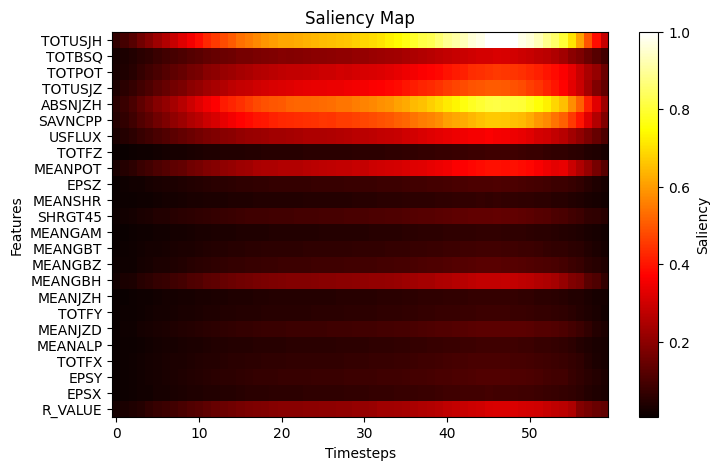

In [75]:
plt.figure(figsize=(8, 5))
plt.imshow(saliency, aspect='auto', cmap='hot')
plt.colorbar(label='Saliency')
plt.xlabel('Timesteps')
plt.ylabel('Features')
plt.title('Saliency Map')
plt.yticks(np.arange(len(words)), words)
# saliency = np.sum(saliency, axis=1)
# plt.savefig(os.path.join(args.log_dir, "saliency_map.eps"))
plt.show()

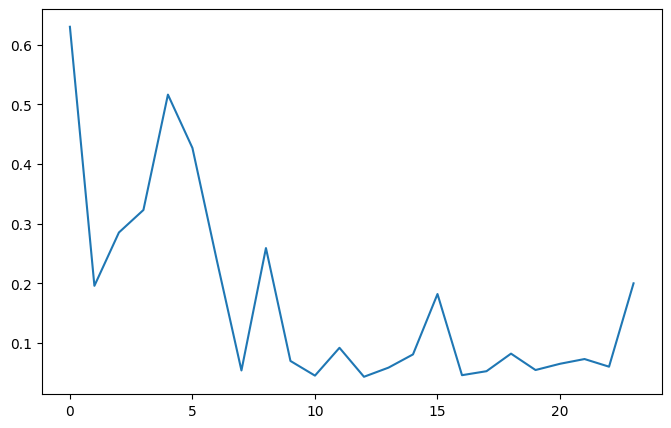

In [77]:
saliency_agg = np.mean(saliency, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(saliency_agg)
plt.show()

In [78]:
ordering = sorted(range(len(words)), key=lambda i: words[i])

In [79]:
words_sorted = [words[i] for i in ordering]
saliency_sorted = [saliency[i] for i in ordering]

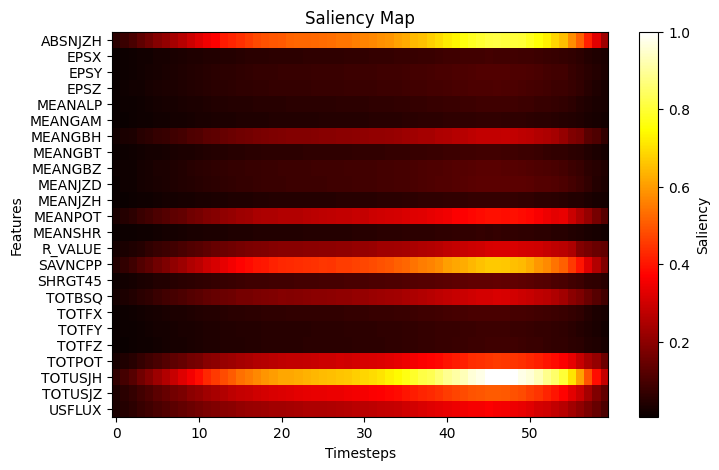

In [99]:
plt.figure(figsize=(8, 5))
im = plt.imshow(saliency_sorted, aspect='auto', cmap='hot')
plt.colorbar(im, label='Saliency')
plt.xlabel('Timesteps')
plt.ylabel('Features')
plt.title('Saliency Map')
plt.yticks(np.arange(len(words_sorted)), words_sorted)
# saliency = np.sum(saliency, axis=1)
plt.savefig(os.path.join(args.log_dir, "saliency_map.eps"), dpi=50, bbox_inches='tight')
plt.show()

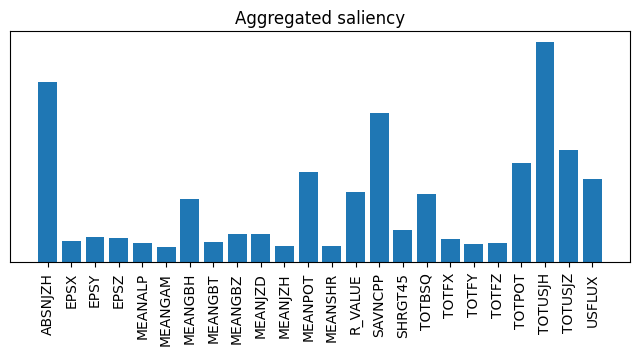

In [91]:
saliency_sorted_agg = np.sum(saliency_sorted, axis=1)
plt.figure(figsize=(8, 3))
plt.xticks(np.arange(len(words_sorted)), words_sorted, rotation=90)
plt.yticks([])
plt.bar(list(range(24)), saliency_sorted_agg)
plt.title("Aggregated saliency")
plt.savefig(os.path.join(args.log_dir, "saliency_agg.eps"), dpi=50, bbox_inches='tight')
plt.show()

In [60]:
largest = sorted(range(len(words)), key=lambda i: saliency_agg[i],  reverse=True)

In [61]:
words[largest[0]], words[largest[1]], words[largest[2]]

('TOTUSJH', 'ABSNJZH', 'SAVNCPP')

In [2]:
float_tuple = (1.2345678, 2.3456789, 3.456789)
"(" + ", ".join(f"{x:.4f}" for x in float_tuple) + ")"

'(1.2346, 2.3457, 3.4568)'

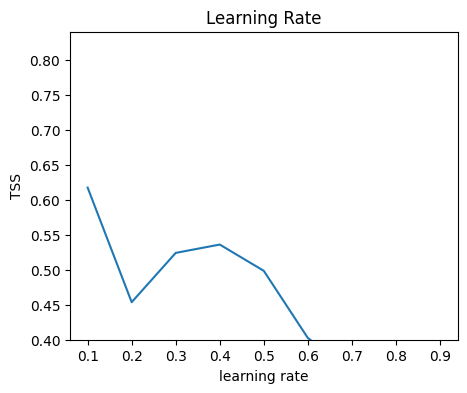

In [6]:
# data = np.load("./experiments_plot/train_True_cm_p_tuning.npy")
# d = [Metric(binary=True, cm=cm) for cm in data]
# 
# datashow = [m.tss for m in d]
# print(datashow)
# fig = plt.figure(figsize=(4, 3))
# ax = fig.add_axes([0, 0, 1, 1])
# x_ticks = [round(0.1 * i + 0.1, 2) for i in range(9)]
# ax.plot(datashow)
# ax.set_xticks(range(0, len(x_ticks)))
# ax.set_xticklabels(x_ticks)
# plt.ylabel("TSS")
# plt.xlabel("Validation fraction of data")
# plt.show()

data = np.load("./experiments_plot/train_True_cm_p_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = [round(0.1 * i + 0.1, 2) for i in range(9)]
plt.ylabel("TSS")
plt.xlabel("learning rate")
plt.plot(x_ticks, tss_view)
plt.ylim(bottom=0.40, top=0.84)
plt.title("Learning Rate")
plt.show()

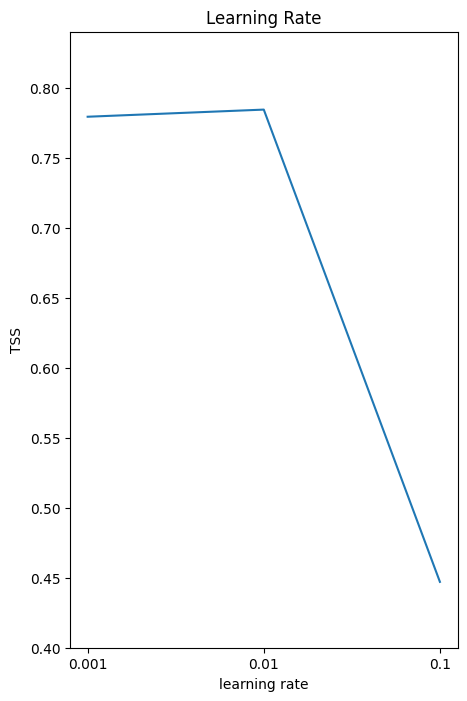

In [34]:
data = np.load("./experiments_plot/train_True_cm_lr_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 8))
x_ticks = ["0.001", "0.01", "0.1"]
plt.ylabel("TSS")
plt.xlabel("learning rate")
plt.plot(x_ticks, tss_view)
plt.ylim(bottom=0.40, top=0.84)
plt.title("Learning Rate")
plt.show()

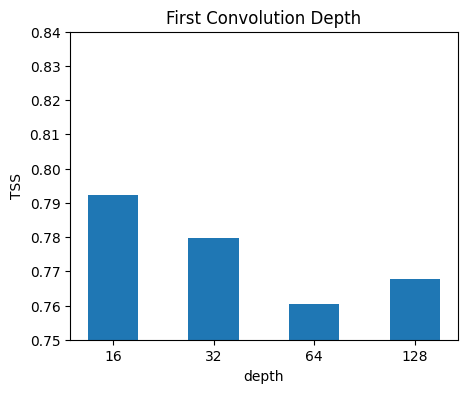

In [20]:
data = np.load("./experiments_plot/train_True_cm_depth1_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("First Convolution Depth")
plt.show()

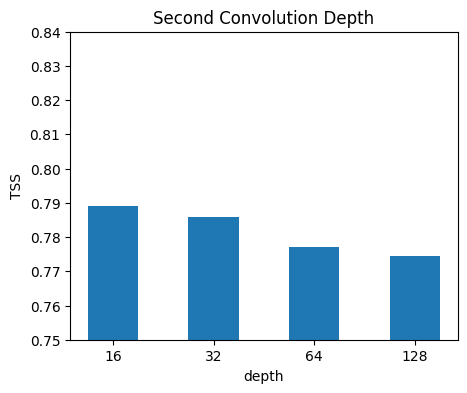

In [21]:
data = np.load("./experiments_plot/train_True_cm_depth2_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Second Convolution Depth")
plt.show()

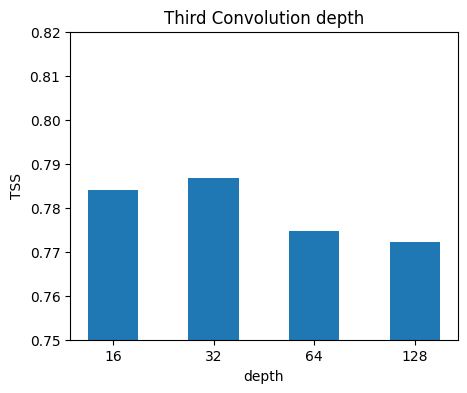

In [37]:
data = np.load("./experiments_plot/train_True_cm_depth3_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("depth")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Third Convolution depth")
plt.show()

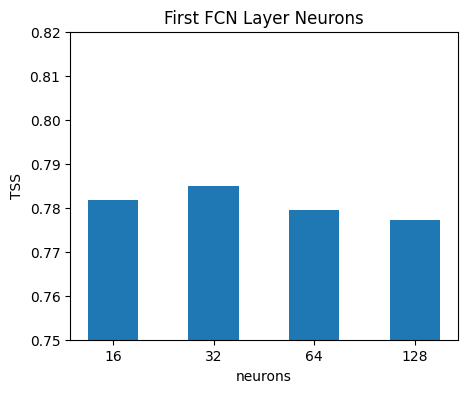

In [36]:
data = np.load("./experiments_plot/train_True_cm_lhidden1_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("neurons")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("First FCN Layer Neurons")
plt.show()

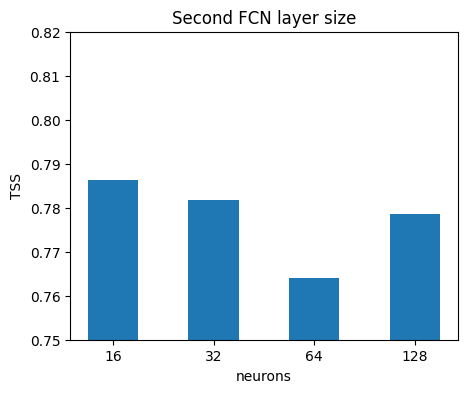

In [35]:
data = np.load("./experiments_plot/train_True_cm_lhidden2_tuning.npy")
tss_view = np.zeros((data.shape[0], data.shape[1]))
for i in range(tss_view.shape[0]):
    for j in range(tss_view.shape[1]):
        tss_view[i][j] = Metric(binary=True, cm=data[i][j]).tss
tss_view = tss_view.mean(axis=0)
fig = plt.figure(figsize=(5, 4))
x_ticks = ["16", "32", "64", "128"]
plt.ylabel("TSS")
plt.xlabel("neurons")
plt.bar(x_ticks, tss_view, width=0.5)
plt.ylim(bottom=0.75, top=0.84)
plt.title("Second FCN layer size")
plt.show()